In [0]:
from skimage.io import imread, imshow, imsave
import numpy as np
from skimage import img_as_float
import copy
import random
import math
import matplotlib.pyplot as plt
import cv2

In [2]:
img = imread('cat.jpg')

FileNotFoundError: ignored

In [0]:
imshow(img);

### 2 Add additional pixels

In [0]:
def add_additional_pixels(img, width, height):
    return np.pad(img, ((width, width),(height, height),(0,0)), mode='mean') 

In [0]:
img_pad = add_additional_pixels(img, 20, 20)
imshow(img_pad);

### 3 Box-filter

In [0]:
def box_filter(img, width, height):
    def __box_alg(img_channel):
        sum_ = 0
        img_channel_copy = copy.copy(img_channel)
        height_ch = img_channel.shape[0]
        width_ch = img_channel.shape[1]
        for i in range(height_ch - width//2 - (width - 1)):
            for j in range(width_ch - height//2 - (height - 1)):
                for k in range(width):
                    for l in range(height):
                        sum_ += img_channel[i + k][j + l]
                img_channel_copy[i + k + width//2][j + l + height//2] = sum_//(width * height)
                sum_ = 0
        return img_channel_copy
    img_pad = add_additional_pixels(img, 20, 20)
    red = __box_alg(img_pad[:,:,0], width,)
    green = __box_alg(img_pad[:,:,1])
    blue = __box_alg(img_pad[:,:,2])
    return np.dstack((red, green, blue))

In [0]:
box_blur_img = box_filter(img, 7, 7)
imshow(box_blur_img);

### 4 Median filter

In [0]:
def median_filter(img, width, height):
    def __median_alg(img_channel):
        list_elem = []
        img_channel_copy = copy.copy(img_channel)
        height_ch = img_channel.shape[0]
        width_ch = img_channel.shape[1]
        for i in range(height_ch - width//2 - (width - 1)):
            for j in range(width_ch - height//2 - (height - 1)):
                for k in range(width):
                    for l in range(height):
                        list_elem.append(img_channel[i+k][j+l])
                list_elem.sort()
                img_channel_copy[i + k + width//2][j + l + height//2] = list_elem[len(list_elem) // 2]
                list_elem = []
        return img_channel_copy
    img_pad = add_additional_pixels(img, 20, 20)
    red = __median_alg(img_pad[:,:,0])
    green = __median_alg(img_pad[:,:,1])
    blue = __median_alg(img_pad[:,:,2])
    return np.dstack((red, green, blue))

In [0]:
median_blur_img = median_filter(img, 7, 7)
imshow(median_blur_img);

### 5 Gauss filter

In [0]:
def gauss_filter(img, width, height):
    def __calc_gauss_matrix(width, height):
        gauss_kernel = [[0 for x in range(width)] for y in range(height)]
        sum_total = 0
        kernelRadius = width // 2
        distance = 0.0
        calculatedEuler = 1.0 / (2.0 * math.pi * (height**2))
        for filterY in range(-kernelRadius, kernelRadius + 1):
            for filterX in range(-kernelRadius, kernelRadius + 1):
                distance = ((filterX * filterX) + (filterY * filterY)) /  (2 * (height * height))
                gauss_kernel[filterY + kernelRadius][filterX + kernelRadius] =  calculatedEuler * math.exp(-distance)
                sum_total += gauss_kernel[filterY + kernelRadius][filterX + kernelRadius]
        for y in range(width):
            for x in range(width):
                gauss_kernel[y][x] = gauss_kernel[y][x] * (1.0 / sum_total)
        return gauss_kernel
    
    def __gauss_alg(img_channel):
        gauss_matrix = __calc_gauss_matrix(width, height)
        sum_ = 0
        img_channel_copy = copy.copy(img_channel)
        height_ch = img_channel.shape[0]
        width_ch = img_channel.shape[1]
        for i in range(height_ch - width//2 - (width - 1)):
            for j in range(width_ch - height//2 - (height - 1)):
                for k in range(width):
                    for l in range(height):
                        sum_ += img_channel[i + k][j + l] * gauss_matrix[k][l]
                img_channel_copy[i + k + width//2][j + l + height//2] = sum_
                sum_ = 0
        return img_channel_copy
    
    img_pad = add_additional_pixels(img, 20, 20)
    red = __gauss_alg(img_pad[:,:,0])
    green = __gauss_alg(img_pad[:,:,1])
    blue = __gauss_alg(img_pad[:,:,2])
    return np.dstack((red, green, blue))

In [0]:
gauss_blur_img = gauss_filter(img, 7, 7)
imshow(gauss_blur_img);

### 6 Compare bluring algorithms

In [0]:
fig, ax = plt.subplots(1,3, figsize= (20,10))
ax[0].imshow(box_blur_img)
ax[0].set_title('Box filter')
ax[1].imshow(median_blur_img)
ax[1].set_title('Median filter')
ax[2].imshow(gauss_blur_img)
ax[2].set_title('Gauss filter');

### 7 Convolution

In [0]:
def convolution(oldimage, kernel):
    div = 6
    image_h = oldimage.shape[0]
    image_w = oldimage.shape[1]
    
    kernel_h = kernel.shape[0]
    kernel_w = kernel.shape[1]
    
    image_pad = add_additional_pixels(oldimage, kernel_w, kernel_h)
    h = kernel_h // 2
    w = kernel_w // 2
    image_conv = np.zeros(image_pad.shape)
    
    for i in range(h, image_pad.shape[0]-h):
        for j in range(w, image_pad.shape[1]-w):
            x = image_pad[i-h:i-h+kernel_h, j-w:j-w+kernel_w]
            image_conv[i][j][0] = (x[:,:,0] * kernel).sum() / div
            image_conv[i][j][1] = (x[:,:,1] * kernel).sum() / div
            image_conv[i][j][2] = (x[:,:,2] * kernel).sum() / div
    image_conv = cv2.normalize(image_conv, None, 0, 255, cv2.NORM_MINMAX)
    return np.asarray(image_conv, dtype = np.uint32)

In [0]:
imshow(img);

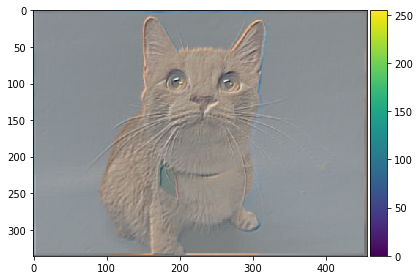

In [0]:
conv1 = np.array([[-2, -1, 0],[-1,1,1],[0, 1, 2]])
img_conv1 = convolution(img, conv1)
imshow(img_conv1);

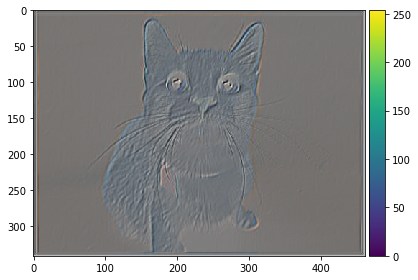

In [0]:
conv2 = np.array([[-5, 0, 0],[-10,10,0],[0, -5, 5]])
img_conv2 = convolution(img_conv1, conv2)
imshow(img_conv2);

### 8 Find borders

In [0]:
def border_image(img, border_method = 'previtt'):
    def __find_borders(matr_x, matr_y):
        matr_y_len = len(matr_y)
        channel = img[:,:,0]
        sum_y = 0
        sum_x = 0
        img_copy = copy.copy(channel)
        height = channel.shape[0]; width = channel.shape[1]
        for i in range(height - matr_y_len//2 - (matr_y_len - 1)):
            for j in range(width - matr_y_len//2 - (matr_y_len - 1)):
                for k in range(matr_y_len):
                    for l in range(matr_y_len):
                        sum_y += channel[i + k][j + l] * matr_y[k][l]
                        sum_x += channel[i + k][j + l] * matr_x[k][l]                
                img_copy[i + k + matr_y_len//2][j + l + matr_y_len//2] = math.sqrt(sum_y**2 + sum_x**2)
                sum_y = 0
                sum_x = 0    
        return img_copy
    
    previtt_y = [[-1,-1, -1],[0,0,0],[1, 1, 1]]
    previtt_x = [[-1,0, 1],[-2,0,2],[-1, 0, 1]]
    roberts_y = [[1,0], [0,-1]]
    roberts_x = [[0,1], [-1,0]]
    sobel_x = [[-1,-2, -1],[0,0,0],[1, 2, 1]]
    sobel_y = [[-1,0, 1],[-2,0,2],[-1, 0, 1]]
    if border_method == 'previtt':
        img_borders = __find_borders(previtt_x, previtt_x)
    elif border_method == 'roberts':
        img_borders = __find_borders(roberts_x, roberts_y)
    else:
        img_borders = __find_borders(sobel_x, sobel_y)  
    return img_borders

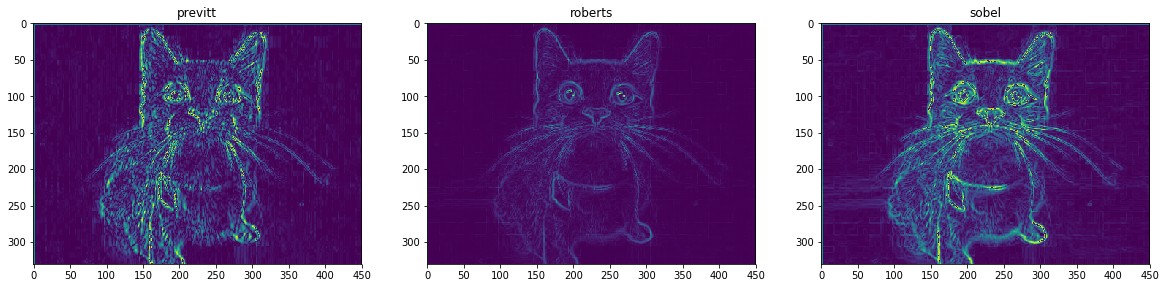

In [0]:
plt.figure(figsize=(20,10))
for index, method_name in enumerate(['previtt', 'roberts', 'sobel']):
    ax = plt.subplot(1,3 ,index+1)
    img_border = border_image(img, method_name)
    ax.imshow(img_border)
    ax.set_title(method_name)